<a href="https://colab.research.google.com/github/Gitcot/Gitcot/blob/main/Projet1_vaccination_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn requests openpyxl

In [28]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import streamlit as st

# Données COVID-19 (exemple)
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
data = pd.read_csv(url)

In [6]:
# Aperçu des données
print(data.head())
print(data.info())  # Vérifier les colonnes et les types de données

      location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                             0.0

Gerer les valeurs manquantes


In [11]:
# 1. Afficher les colonnes pour vérifier
print("Colonnes disponibles :", data.columns.tolist())

Colonnes disponibles : ['location', 'iso_code', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated', 'daily_people_vaccinated_per_hundred']


In [12]:
# 2. Supprimer uniquement les colonnes existantes
colonnes_inutiles = [ "iso_code"]  # Ajoute d'autres colonnes si besoin
data_clean = data.drop(columns=[col for col in colonnes_inutiles if col in data.columns])


In [14]:
# 3. Nettoyer les NaN
data_clean.fillna(0, inplace=True)
print(data_clean.head())

      location        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 0.0                0.0   
2  Afghanistan  2021-02-24                 0.0                0.0   
3  Afghanistan  2021-02-25                 0.0                0.0   
4  Afghanistan  2021-02-26                 0.0                0.0   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      0.0             0.0                     0.0   
1                      0.0             0.0                     0.0   
2                      0.0             0.0                     0.0   
3                      0.0             0.0                     0.0   
4                      0.0             0.0                     0.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 0.0                             0.0   
1              1367.0                             

In [15]:
# Vérifier les doublons
print(data_clean.duplicated().sum())

0


In [16]:
benin_data = data_clean[data_clean["location"] == "Benin"]

In [17]:
print(benin_data.describe())

       total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        5.860000e+02       5.860000e+02             5.860000e+02   
mean         1.292794e+05       1.109178e+05             7.613722e+04   
std          6.244386e+05       5.452170e+05             4.066381e+05   
min          0.000000e+00       0.000000e+00             0.000000e+00   
25%          0.000000e+00       0.000000e+00             0.000000e+00   
50%          0.000000e+00       0.000000e+00             0.000000e+00   
75%          0.000000e+00       0.000000e+00             0.000000e+00   
max          4.232541e+06       3.697190e+06             2.742837e+06   

       total_boosters  daily_vaccinations_raw  daily_vaccinations  \
count           586.0                   586.0          586.000000   
mean              0.0                     0.0         7140.213311   
std               0.0                     0.0        10324.728294   
min               0.0                     0.0            0.000000 

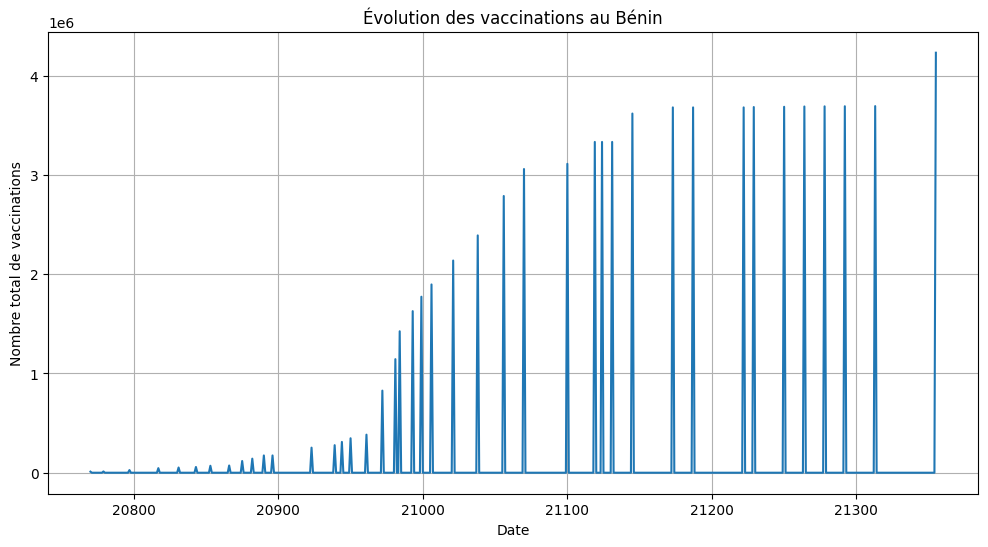

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=benin_data, x=benin_data.index, y="total_vaccinations")
plt.title("Évolution des vaccinations au Bénin")
plt.xlabel("Date")
plt.ylabel("Nombre total de vaccinations")
plt.grid()
plt.show()

comparaison avec d'autre pays


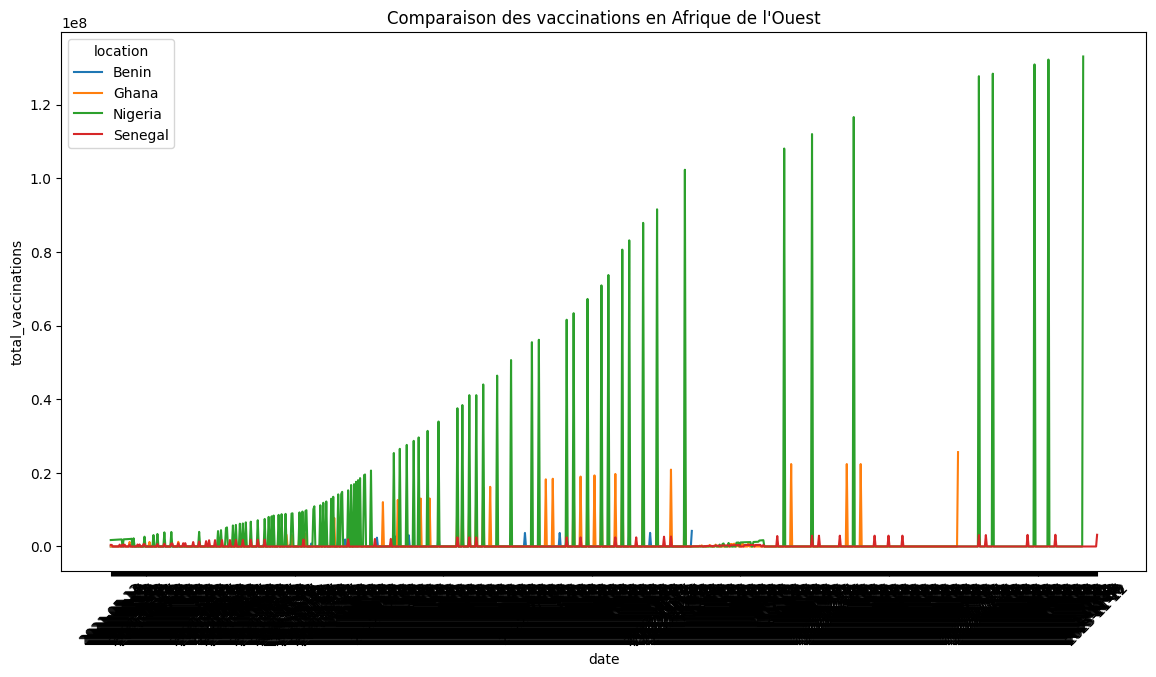

In [21]:
africa_countries = ["Benin", "Nigeria", "Ghana", "Senegal"]
africa_data = data_clean[data_clean["location"].isin(africa_countries)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=africa_data, x="date", y="total_vaccinations", hue="location")
plt.title("Comparaison des vaccinations en Afrique de l'Ouest")
plt.xticks(rotation=45)
plt.show()

exportation des données nettoyer

In [22]:
benin_data.to_csv("benin_vaccination_clean.csv")

generation de carte interractive des vaccination


In [23]:
!pip install folium
import folium

In [24]:
# Exemple avec des données fictives (remplace par tes vraies données)
data_geo = {
    "Ville": ["Cotonou", "Porto-Novo", "Parakou"],
    "Latitude": [6.3654, 6.4969, 9.3400],
    "Longitude": [2.4183, 2.6289, 2.6200],
    "Taux_Vaccination": [45, 30, 60]  # En %
}
df_geo = pd.DataFrame(data_geo)

In [25]:
# Créer une carte centrée sur le Bénin
m = folium.Map(location=[9.3077, 2.3158], zoom_start=7)

# Ajouter des marqueurs
for idx, row in df_geo.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=row["Taux_Vaccination"]*0.5,  # Ajuste la taille
        color="blue",
        fill=True,
        fill_color="blue",
        popup=f"{row['Ville']}: {row['Taux_Vaccination']}%"
    ).add_to(m)

# Afficher
m.save("carte_vaccination.html")
m  # Affiche directement dans Colab

In [26]:
# Script: auto_vaccination.py
import pandas as pd
import requests
from datetime import datetime

# Télécharger les données
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
data = pd.read_csv(url)

# Nettoyer et filtrer pour le Bénin
benin_data = data[data["location"] == "Benin"].fillna(0)

# Sauvegarder avec la date du jour
today = datetime.now().strftime("%Y-%m-%d")
benin_data.to_csv(f"benin_vaccination_{today}.csv")

print("Données mises à jour !")

Données mises à jour !


mettre en place un dashbord  avec streamlit

In [36]:
import streamlit as st
import pandas as pd

# Charger les données
data = pd.read_csv("benin_vaccination_clean.csv")
print (data.head())


   Unnamed: 0 location        date  total_vaccinations  people_vaccinated  \
0       20770    Benin  2021-05-12             10683.0            10683.0   
1       20771    Benin  2021-05-13                 0.0                0.0   
2       20772    Benin  2021-05-14                 0.0                0.0   
3       20773    Benin  2021-05-15                 0.0                0.0   
4       20774    Benin  2021-05-16                 0.0                0.0   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      0.0             0.0                     0.0   
1                      0.0             0.0                     0.0   
2                      0.0             0.0                     0.0   
3                      0.0             0.0                     0.0   
4                      0.0             0.0                     0.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 0.0                            0.08   
1 

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           586 non-null    int64  
 1   location                             586 non-null    object 
 2   date                                 586 non-null    object 
 3   total_vaccinations                   586 non-null    float64
 4   people_vaccinated                    586 non-null    float64
 5   people_fully_vaccinated              586 non-null    float64
 6   total_boosters                       586 non-null    float64
 7   daily_vaccinations_raw               586 non-null    float64
 8   daily_vaccinations                   586 non-null    float64
 9   total_vaccinations_per_hundred       586 non-null    float64
 10  people_vaccinated_per_hundred        586 non-null    float64
 11  people_fully_vaccinated_per_hund

In [38]:
# Convertir la date en datetime (si ce n'est pas déjà fait)
data["date"] = pd.to_datetime(data["date"])

In [39]:
# Widgets
st.sidebar.header("Filtres")
selected_column = st.sidebar.selectbox(
    "Choisir une métrique",
    options=data.select_dtypes(include=['int64', 'float64']).columns  # Affiche uniquement les colonnes numériques
)

2025-07-03 20:12:21.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 20:12:21.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
!streamlit run auto_vaccination_app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.150.252.24:8501

⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [46]:
# Create the Streamlit app content as a string
streamlit_app_code = """
import streamlit as st
import pandas as pd

# Charger les données
data = pd.read_csv("benin_vaccination_clean.csv")

# Convertir la date en datetime
data["date"] = pd.to_datetime(data["date"])

# Widgets
st.sidebar.header("Filtres")
selected_column = st.sidebar.selectbox(
    "Choisir une métrique",
    options=data.select_dtypes(include=['int64', 'float64']).columns  # Affiche uniquement les colonnes numériques
)

# Conversion sécurisée
data[selected_column] = pd.to_numeric(data[selected_column], errors='coerce')
data.dropna(subset=[selected_column], inplace=True)


# Visualisation
st.line_chart(
    data.set_index("date")[selected_column],
    use_container_width=True
)
"""

# Save the Streamlit app code to a file
with open("auto_vaccination_app.py", "w") as f:
    f.write(streamlit_app_code)